#### Problem Statement : Do an exploratory data analysis for the Starbuck Dataset with feature attributes that focuses on Food Menu and Drinks Menu considering the Nutrition Facts along. Wrap the analysis by subjecting favorable points with a final conclusion that ejects from the complete understanding.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [73]:
data = pd.read_csv('starbucks_drinkMenu_expanded.csv')
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [76]:
data.columns = data.columns.str.lstrip()

In [77]:
data.columns = data.columns.str.rstrip()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [79]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [80]:
data[data['Total Fat (g)']== '3 2']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


In [81]:
data['Total Fat (g)'].replace('3 2','3.2',inplace = True)

In [82]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3.2'], dtype=object)

In [83]:
data['Total Fat (g)'] = data['Total Fat (g)'].astype(float)
print(data['Total Fat (g)'].dtype)

float64


In [84]:
data['Total Fat (Trans,Sat) (g)'] = data['Total Fat (g)'] + data['Trans Fat (g)'] + data['Saturated Fat (g)']

In [85]:
data.drop('Total Fat (g)' , axis = 1, inplace = True)

In [86]:
data.drop('Trans Fat (g)' , axis = 1, inplace = True)

In [87]:
data.drop('Saturated Fat (g)' , axis = 1, inplace = True)

In [88]:
data['Vitamin A (% DV)'] = data['Vitamin A (% DV)'].map(lambda x: x.rstrip('%'))
data['Vitamin C (% DV)'] = data['Vitamin C (% DV)'].map(lambda x: x.rstrip('%'))
data['Calcium (% DV)'] = data['Calcium (% DV)'].map(lambda x: x.rstrip('%'))
data['Iron (% DV)'] = data['Iron (% DV)'].map(lambda x: x.rstrip('%'))
data['Vitamin A (% DV)'] = data['Vitamin A (% DV)'].astype(float)
data['Vitamin C (% DV)'] = data['Vitamin C (% DV)'].astype(float)
data['Calcium (% DV)'] = data['Calcium (% DV)'].astype(float)
data['Iron (% DV)'] = data['Iron (% DV)'].astype(float)

In [89]:
print(data['Vitamin A (% DV)'].unique())
print(data['Vitamin C (% DV)'].unique())
print(data['Calcium (% DV)'].unique())
print(data['Iron (% DV)'].unique())

[ 0. 10.  6. 15. 20. 30. 25.  8.  4.  2. 50.]
[  0.   2.   4.   6.  10.  15.  20.  80. 100.   8.]
[ 0.  2. 20. 30. 40. 50. 15. 25. 35. 45. 10. 60.  6.  8.]
[ 0.  8. 15. 25. 10. 20. 30. 40. 50.  6.  2.  4. 35.]


In [90]:
print(data['Vitamin A (% DV)'].dtype)
print(data['Vitamin C (% DV)'].dtype)
print(data['Calcium (% DV)'] .dtype)
print(data['Iron (% DV)'].dtype)

float64
float64
float64
float64


In [91]:
data['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [92]:
data['Caffeine (mg)'] = pd.to_numeric(data['Caffeine (mg)'], errors = 'coerce').astype('Int64')

In [93]:
caff_mean = data['Caffeine (mg)'].mean().round(0)

In [94]:
data['Caffeine (mg)'].replace(np.nan,caff_mean, inplace = True)

In [95]:
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
Sodium (mg)                  0
Total Carbohydrates (g)      0
Cholesterol (mg)             0
Dietary Fibre (g)            0
Sugars (g)                   0
Protein (g)                  0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
Calcium (% DV)               0
Iron (% DV)                  0
Caffeine (mg)                0
Total Fat (Trans,Sat) (g)    0
dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4   Sodium (mg)                242 non-null    int64  
 5   Total Carbohydrates (g)    242 non-null    int64  
 6   Cholesterol (mg)           242 non-null    int64  
 7   Dietary Fibre (g)          242 non-null    int64  
 8   Sugars (g)                 242 non-null    int64  
 9   Protein (g)                242 non-null    float64
 10  Vitamin A (% DV)           242 non-null    float64
 11  Vitamin C (% DV)           242 non-null    float64
 12  Calcium (% DV)             242 non-null    float64
 13  Iron (% DV)                242 non-null    float64

In [99]:
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
Sodium (mg)                  0
Total Carbohydrates (g)      0
Cholesterol (mg)             0
Dietary Fibre (g)            0
Sugars (g)                   0
Protein (g)                  0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
Calcium (% DV)               0
Iron (% DV)                  0
Caffeine (mg)                0
Total Fat (Trans,Sat) (g)    0
dtype: int64

In [100]:
data.duplicated().sum()

0

In [102]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),"Total Fat (Trans,Sat) (g)"
0,Coffee,Brewed Coffee,Short,3,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175,0.1
1,Coffee,Brewed Coffee,Tall,4,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260,0.1
2,Coffee,Brewed Coffee,Grande,5,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330,0.1
3,Coffee,Brewed Coffee,Venti,5,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410,0.1
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75,0.2


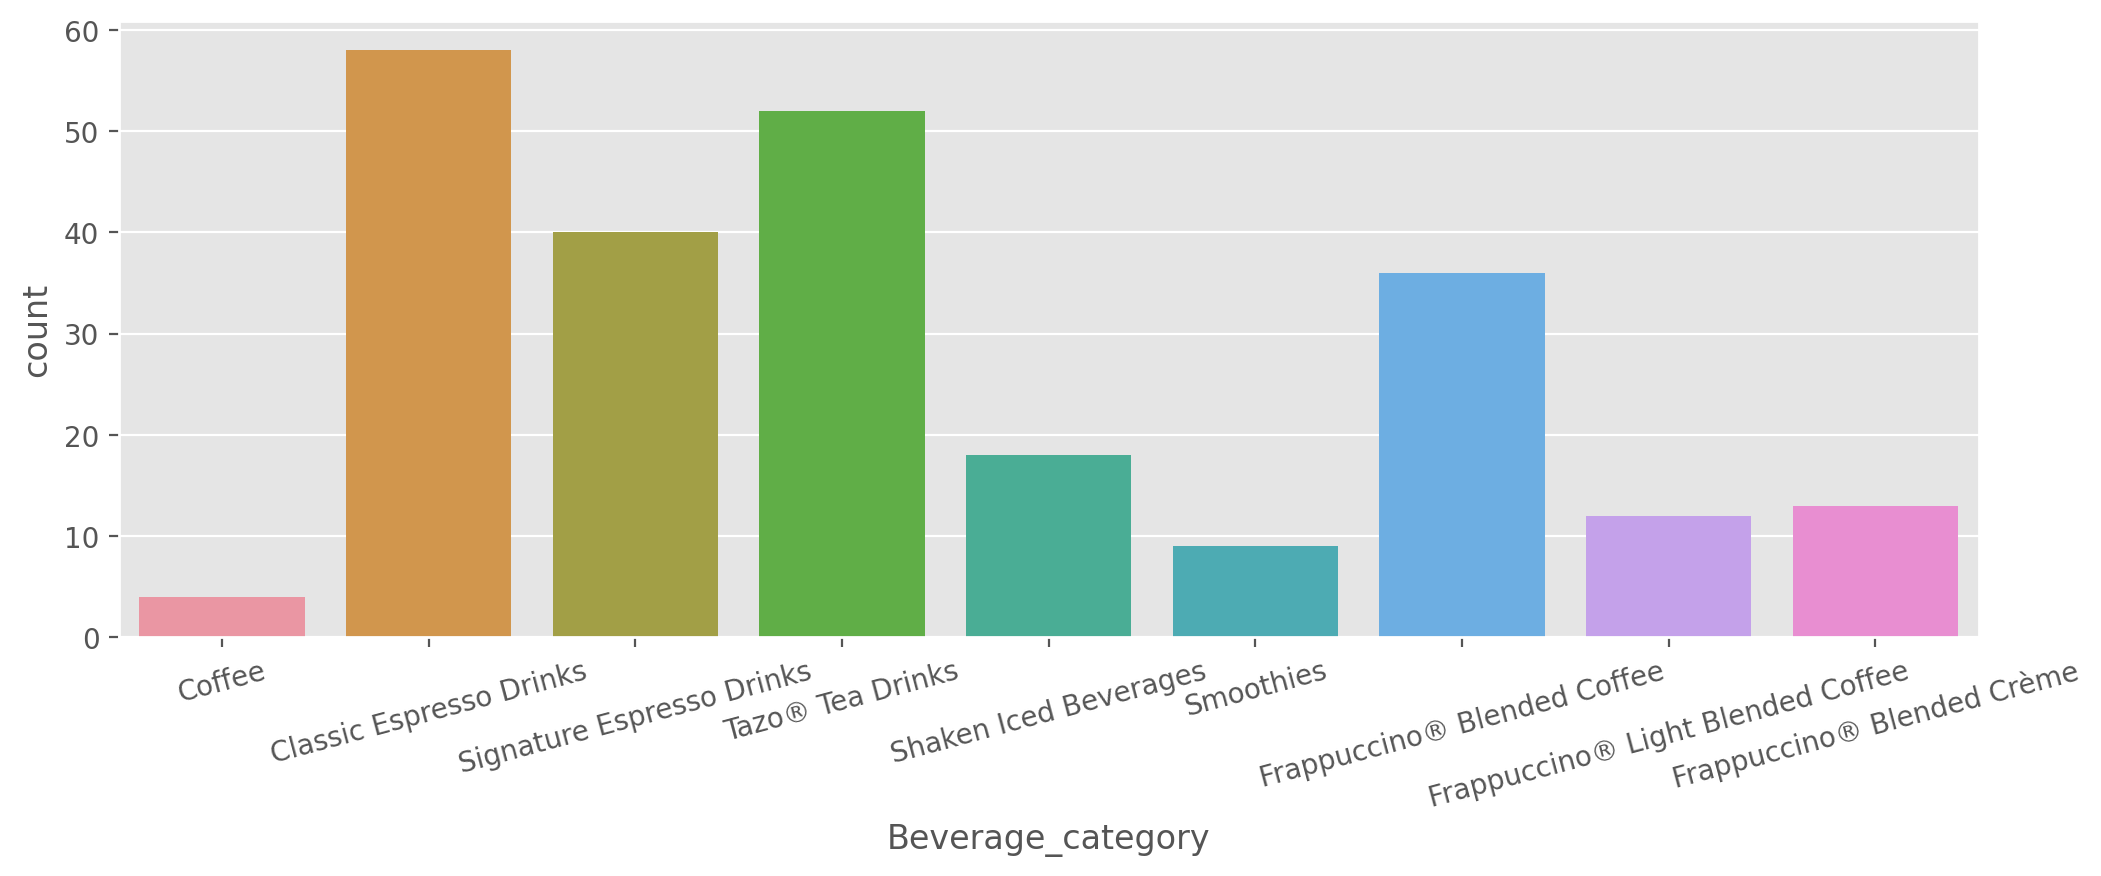

In [103]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot('Beverage_category', data = data)
plt.xticks(rotation = 15)
plt.show()

#### 'Signature Espresso Drinks', 'Classic Espresso Drinks' and 'Tazo® Tea Drinks' is the most common category among all drink categories where 'Classic Espresso Drinks' is leading all. 

In [104]:
classic = data[data['Beverage_category']== 'Classic Espresso Drinks']
signature = data[data['Beverage_category']== 'Signature Espresso Drinks']
Tazo = data[data['Beverage_category']== 'Tazo® Tea Drinks']

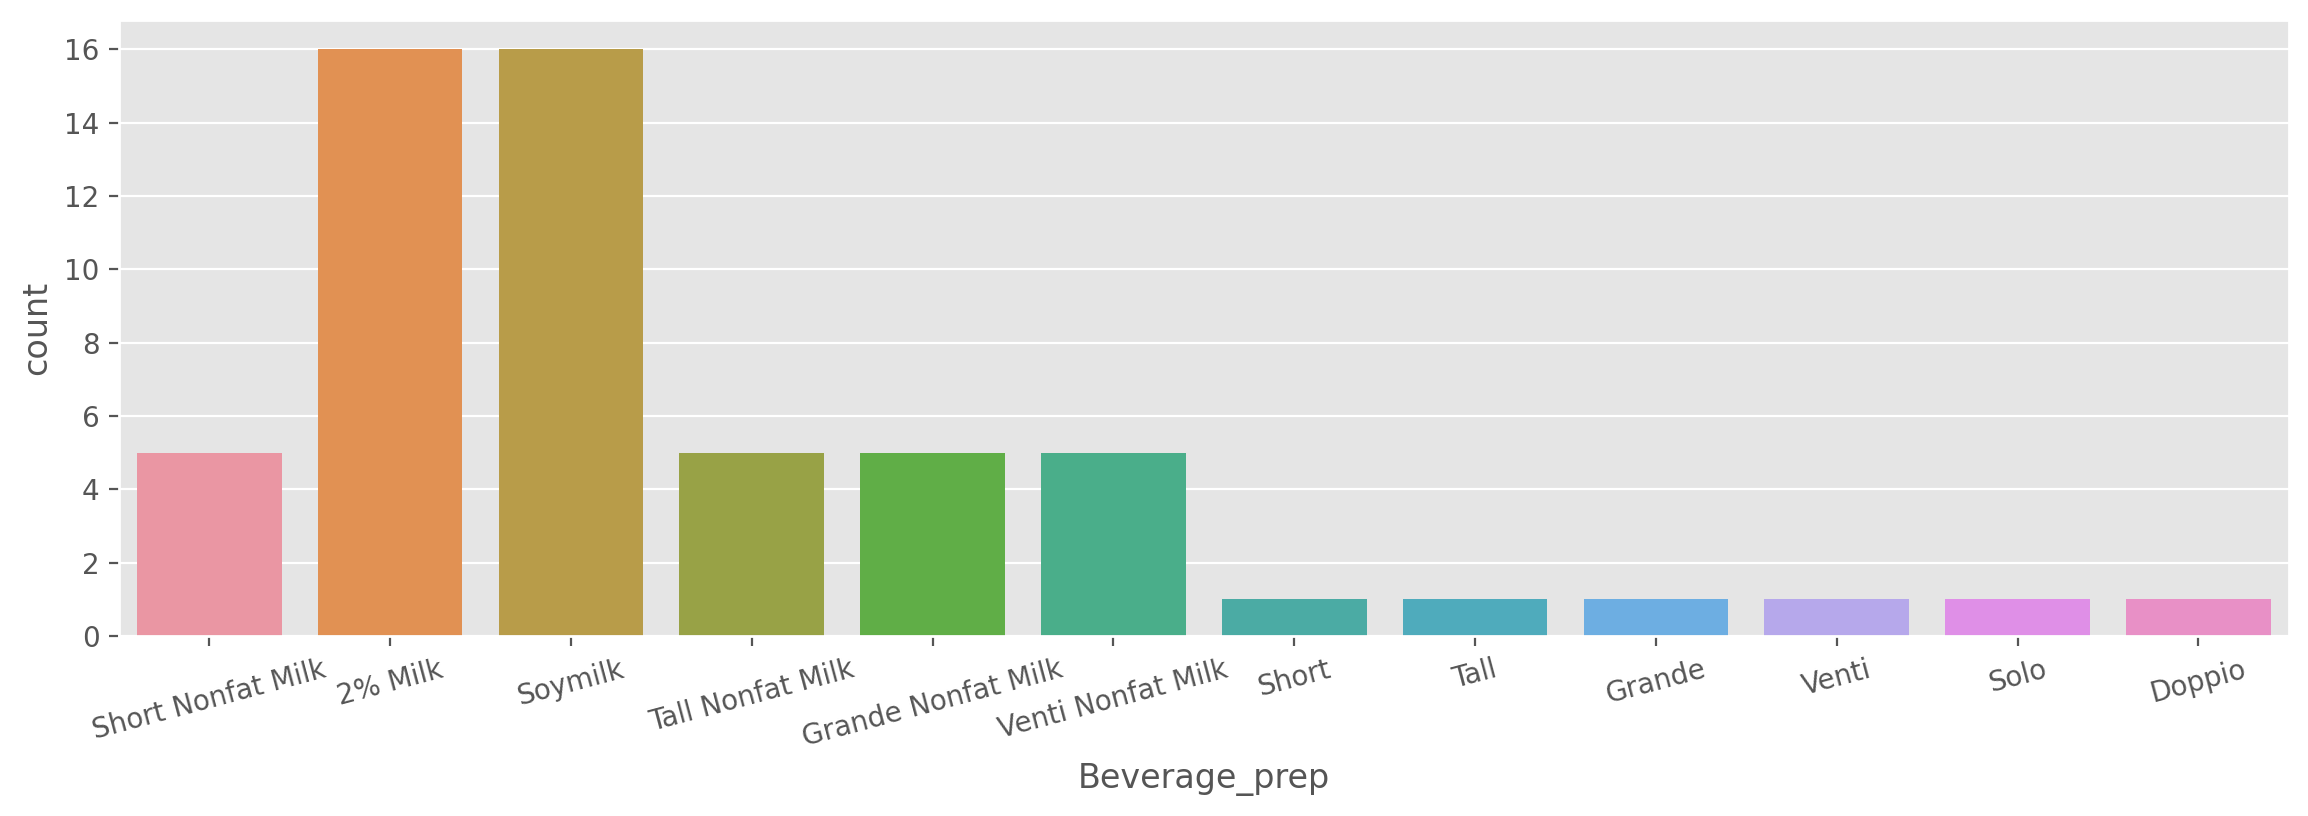

In [105]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot('Beverage_prep', data = classic)
plt.xticks(rotation = 15)
plt.show()

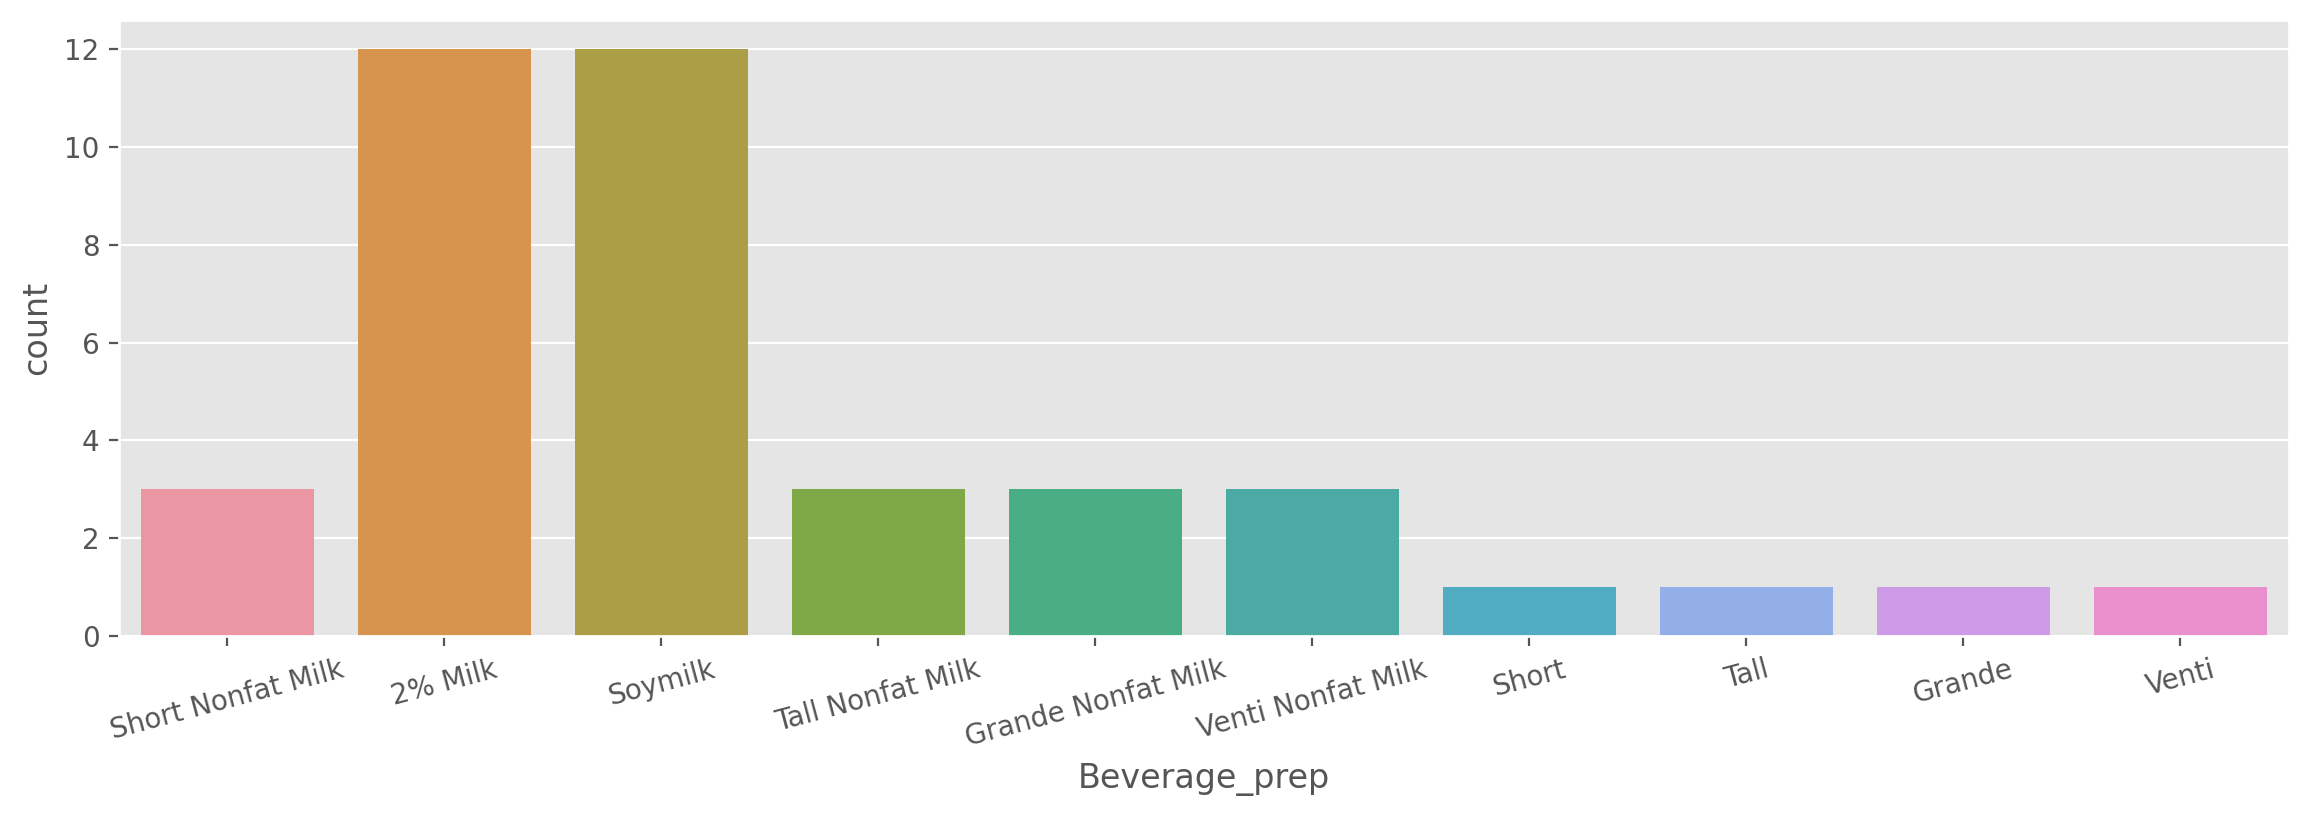

In [106]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot('Beverage_prep', data = signature)
plt.xticks(rotation = 15)
plt.show()

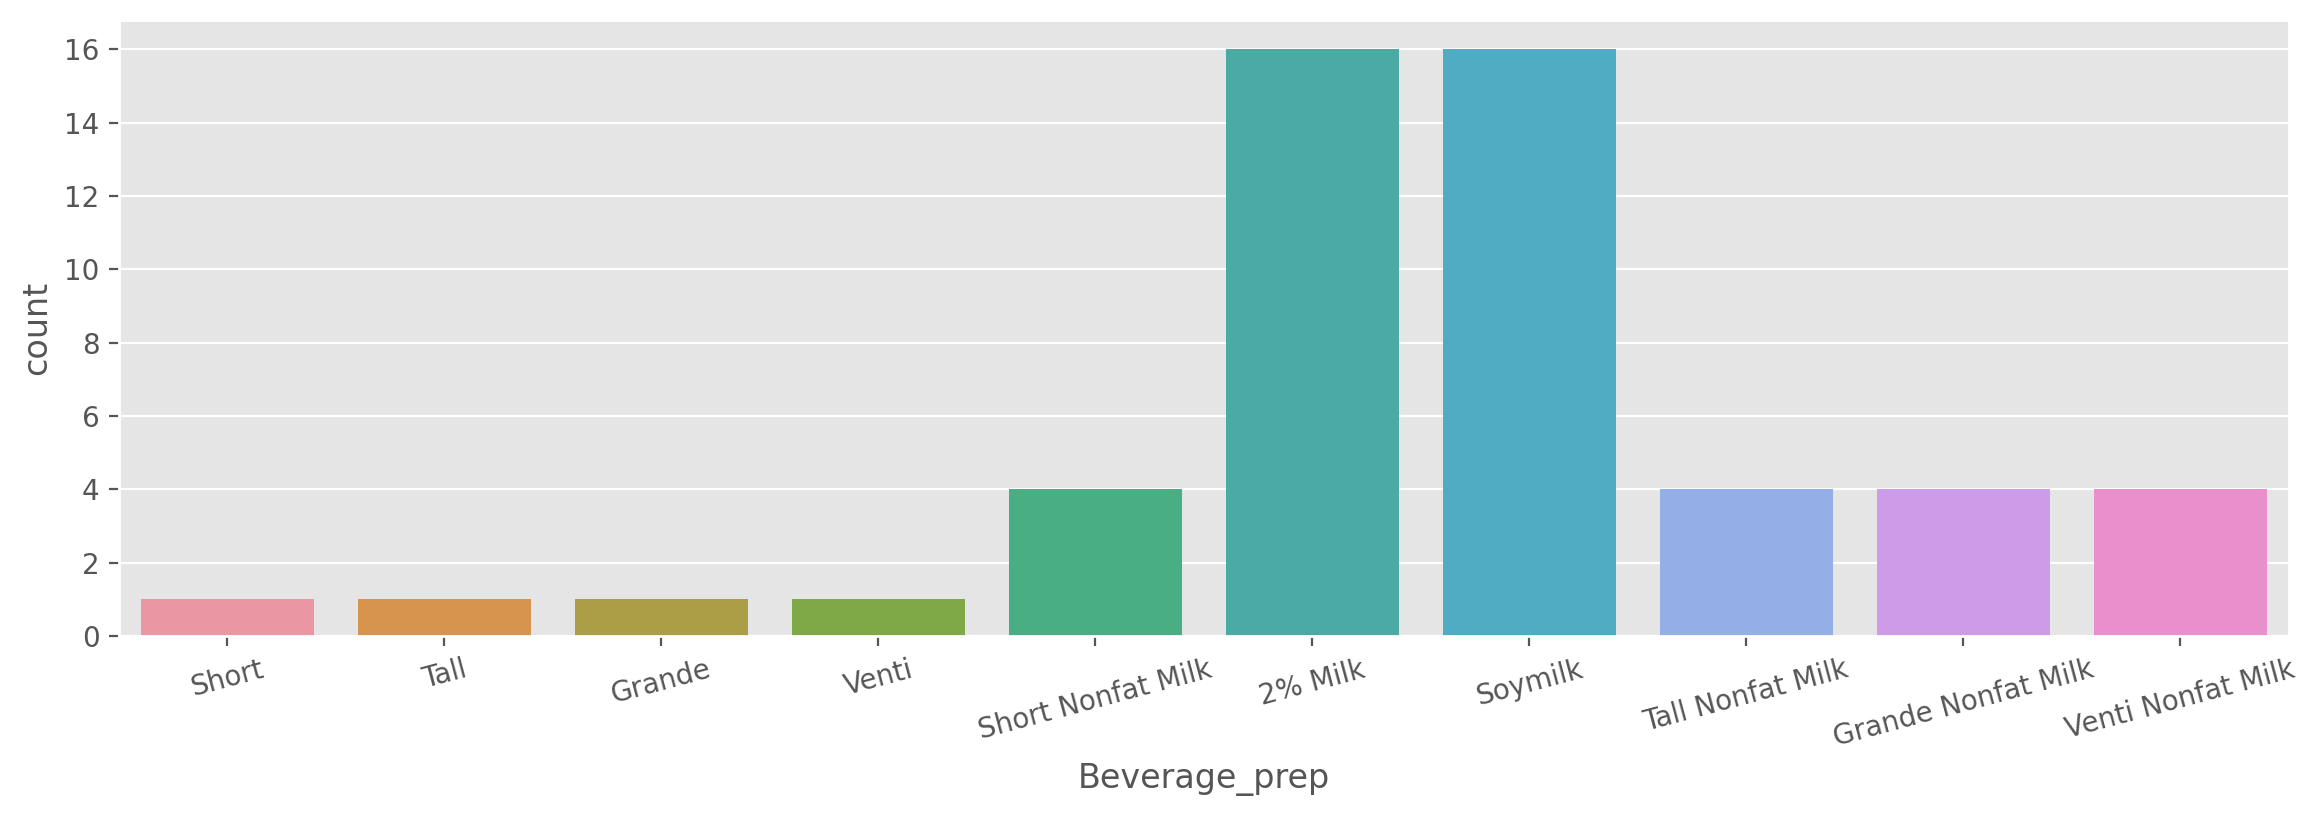

In [107]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot('Beverage_prep', data = Tazo)
plt.xticks(rotation = 15)
plt.show()

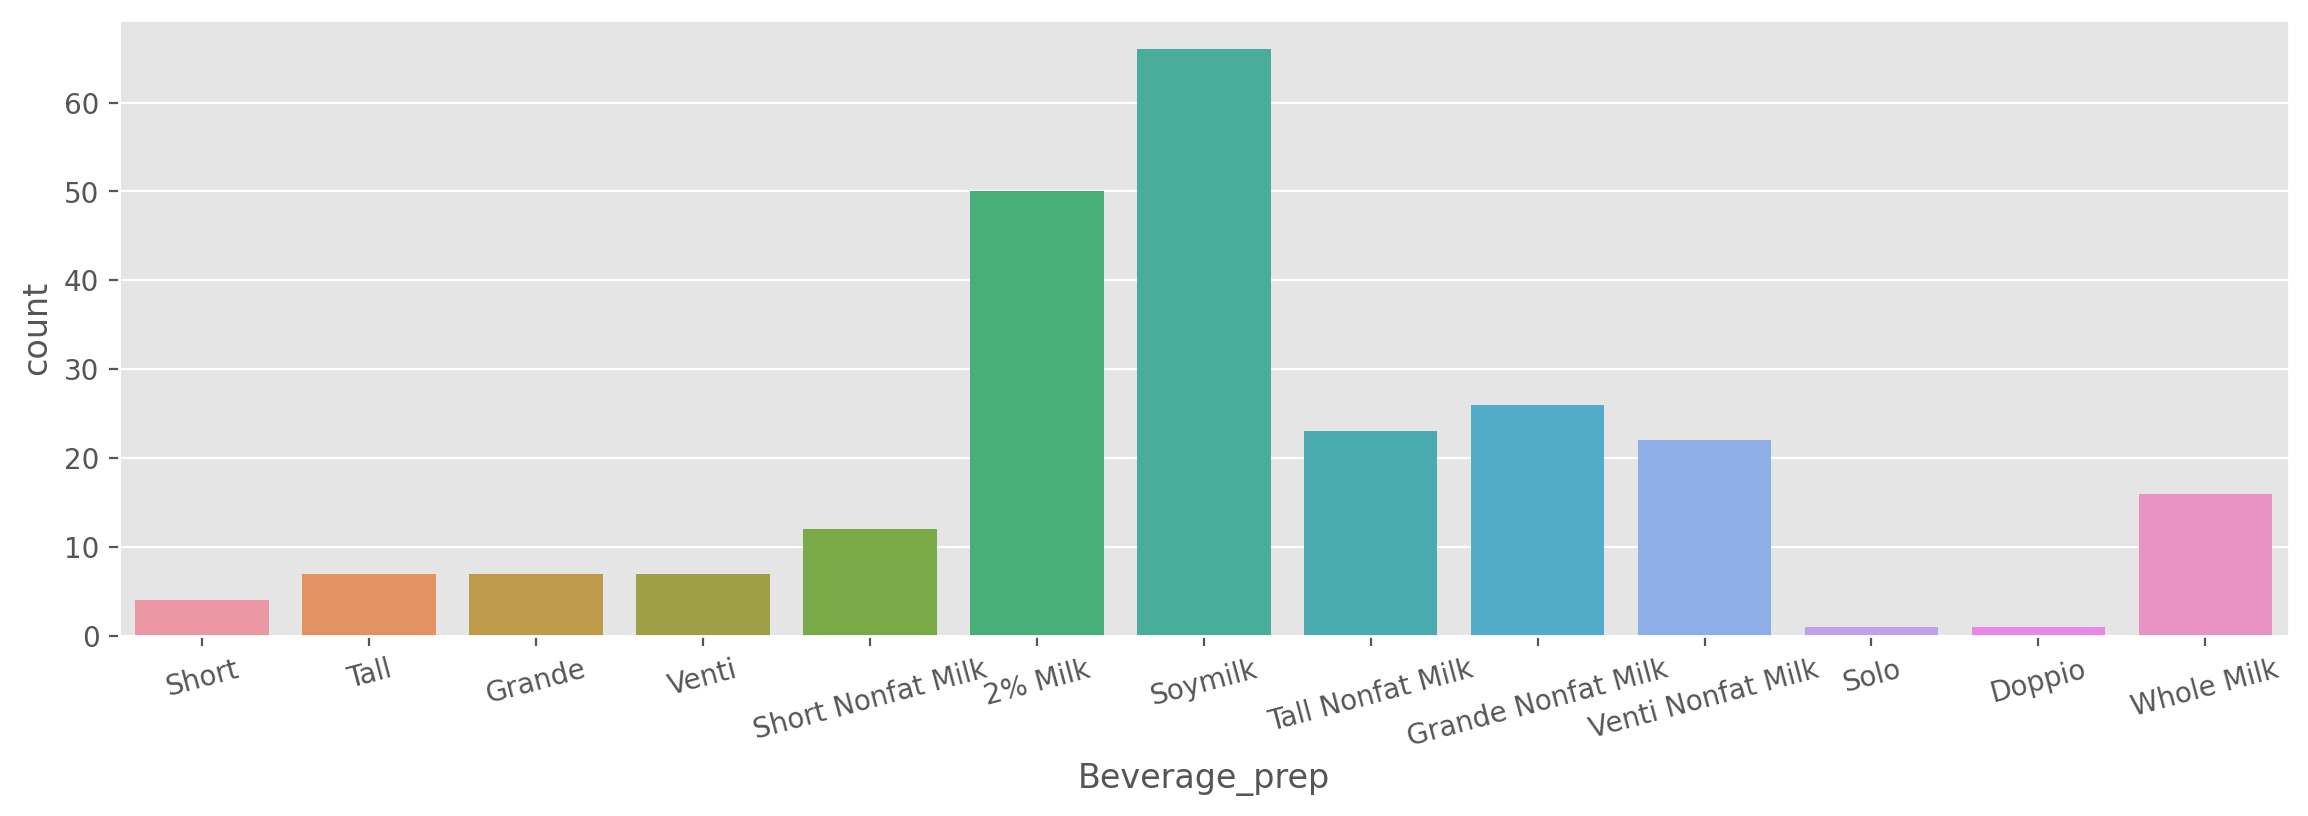

In [108]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot('Beverage_prep', data = data)
plt.xticks(rotation = 15)
plt.show()

#### For all the beverage categories soymilk is the most commonly used product whereas for catagories like 'Signature Espresso Drinks', 'Classic Espresso Drinks' and 'Tazo® Tea Drinks', 2% milk and soymilk is most commonly used.

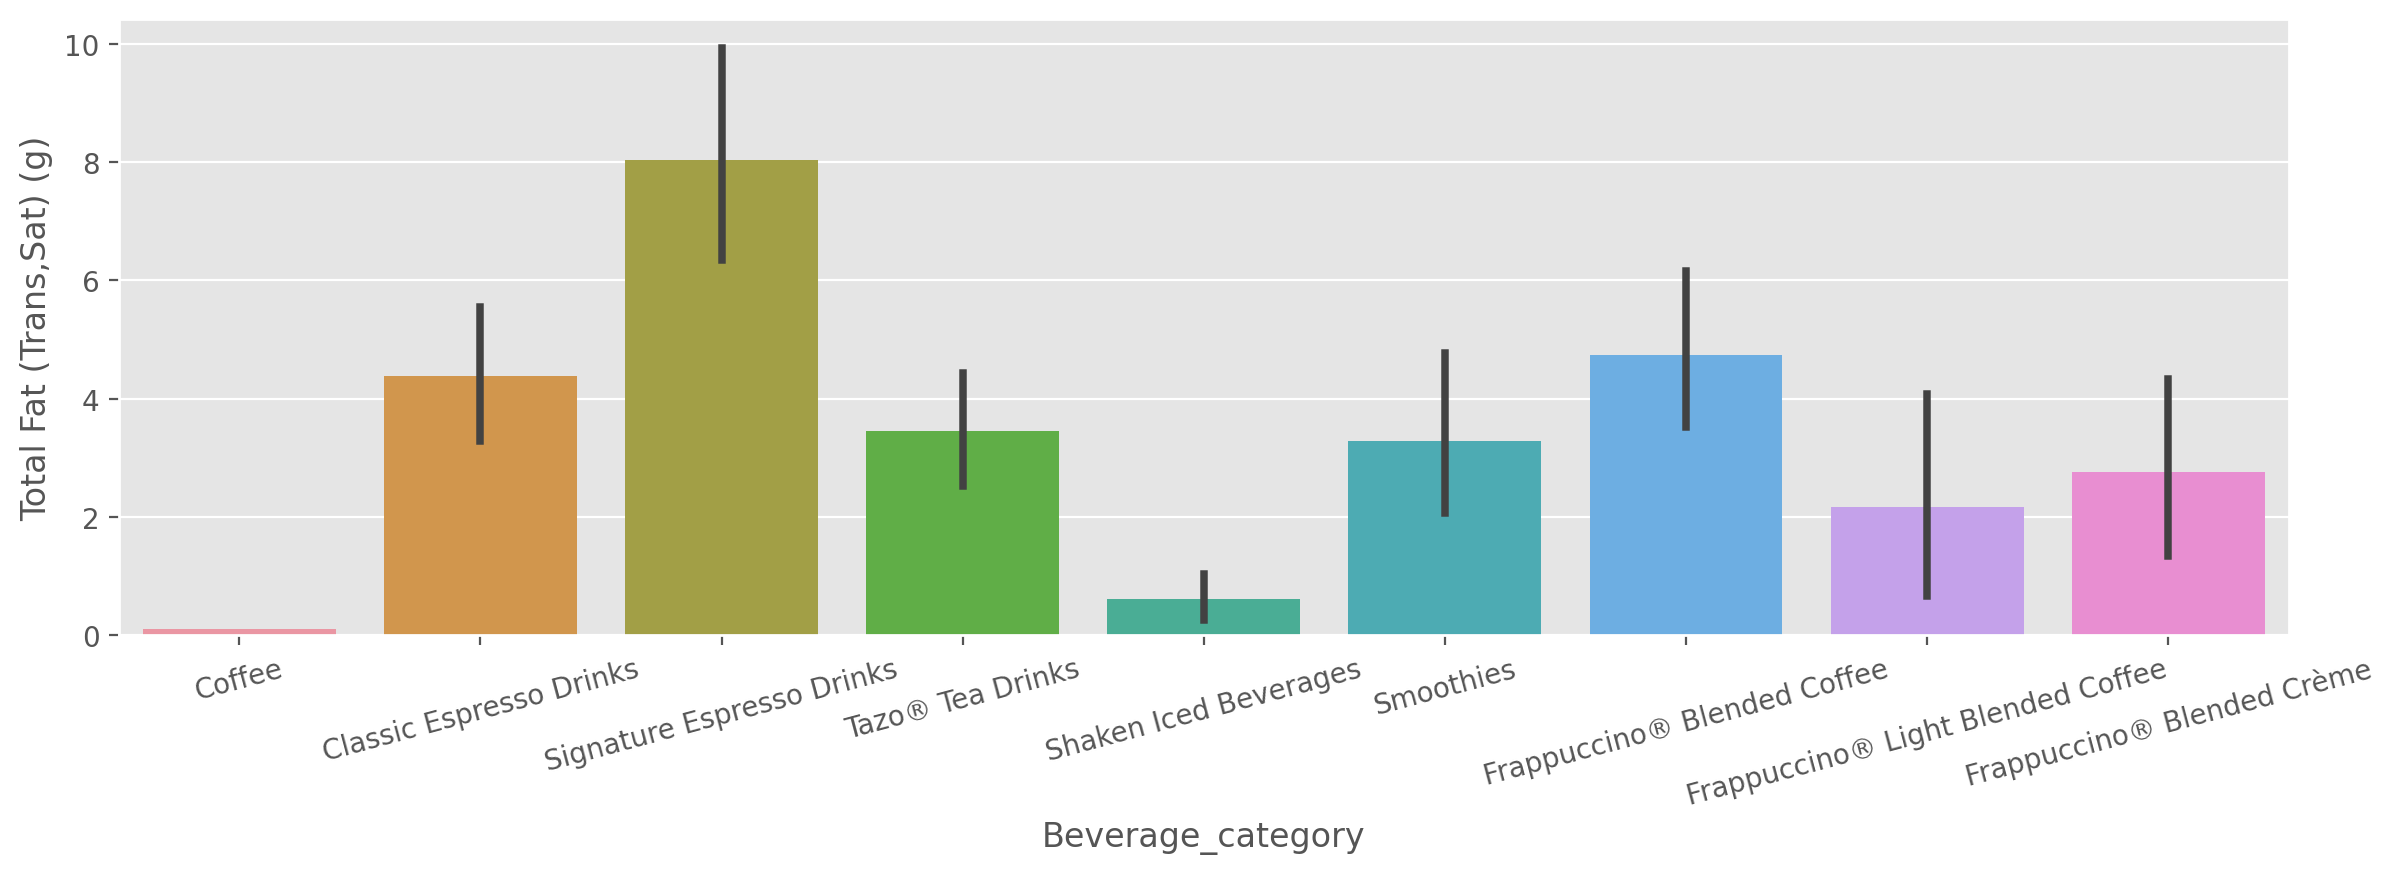

In [112]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Total Fat (Trans,Sat) (g)', data = data)
plt.xticks(rotation = 15)
plt.show()

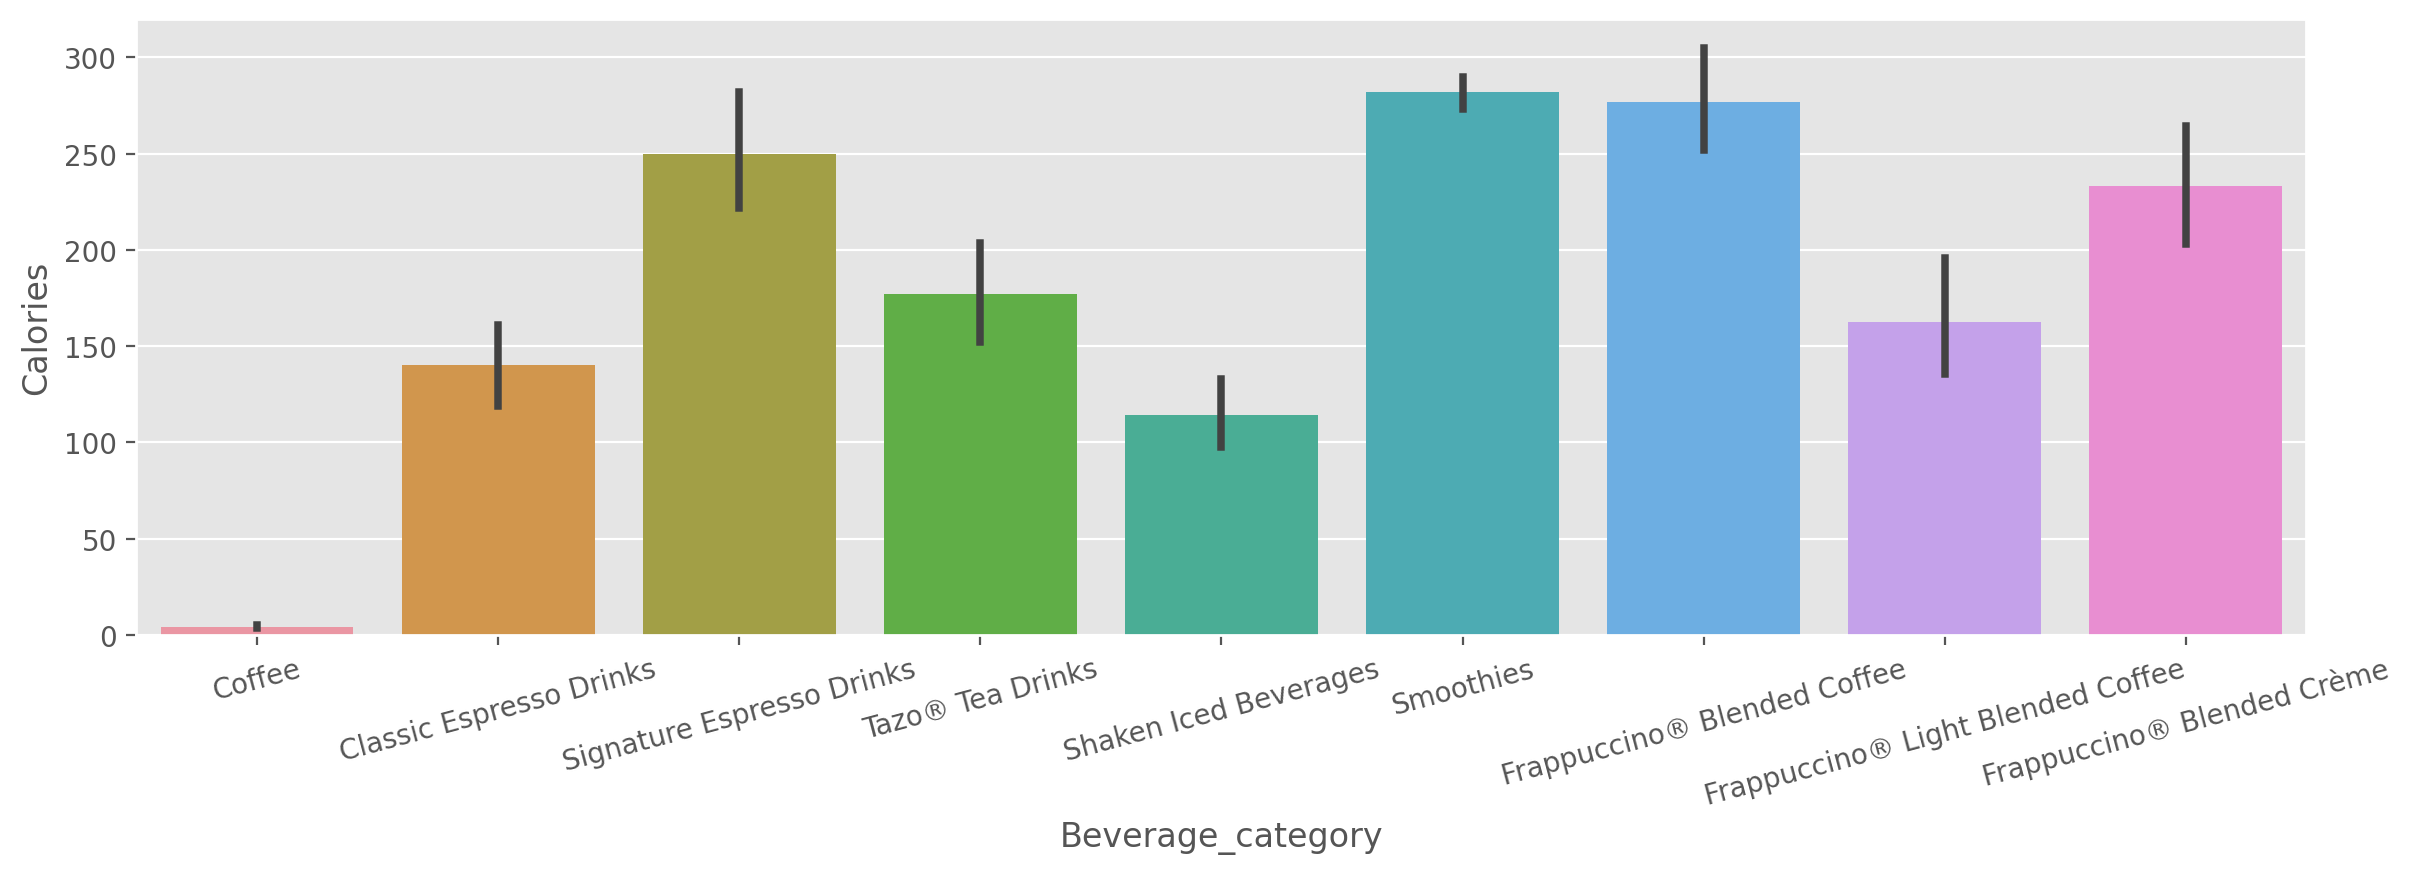

In [113]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Calories', data = data)
plt.xticks(rotation = 15)
plt.show()

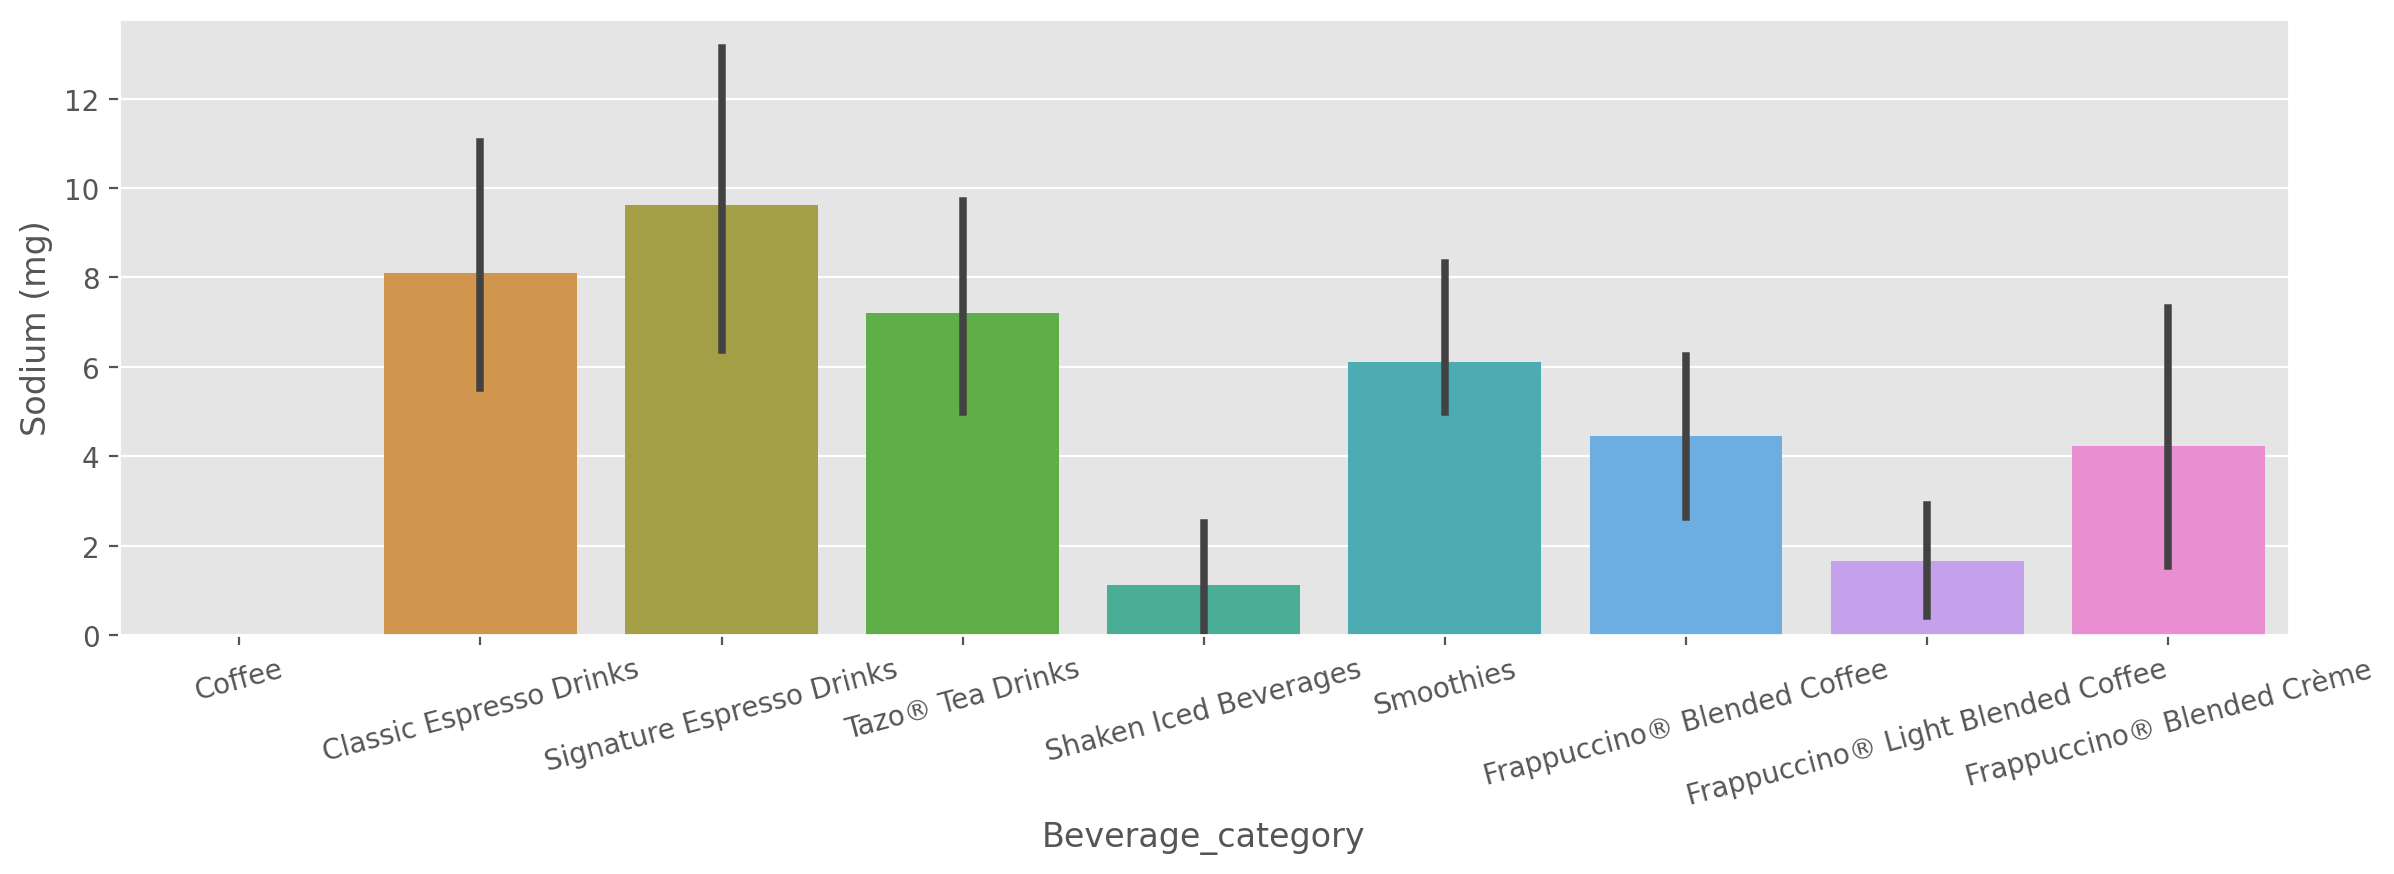

In [114]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Sodium (mg)', data = data)
plt.xticks(rotation = 15)
plt.show()

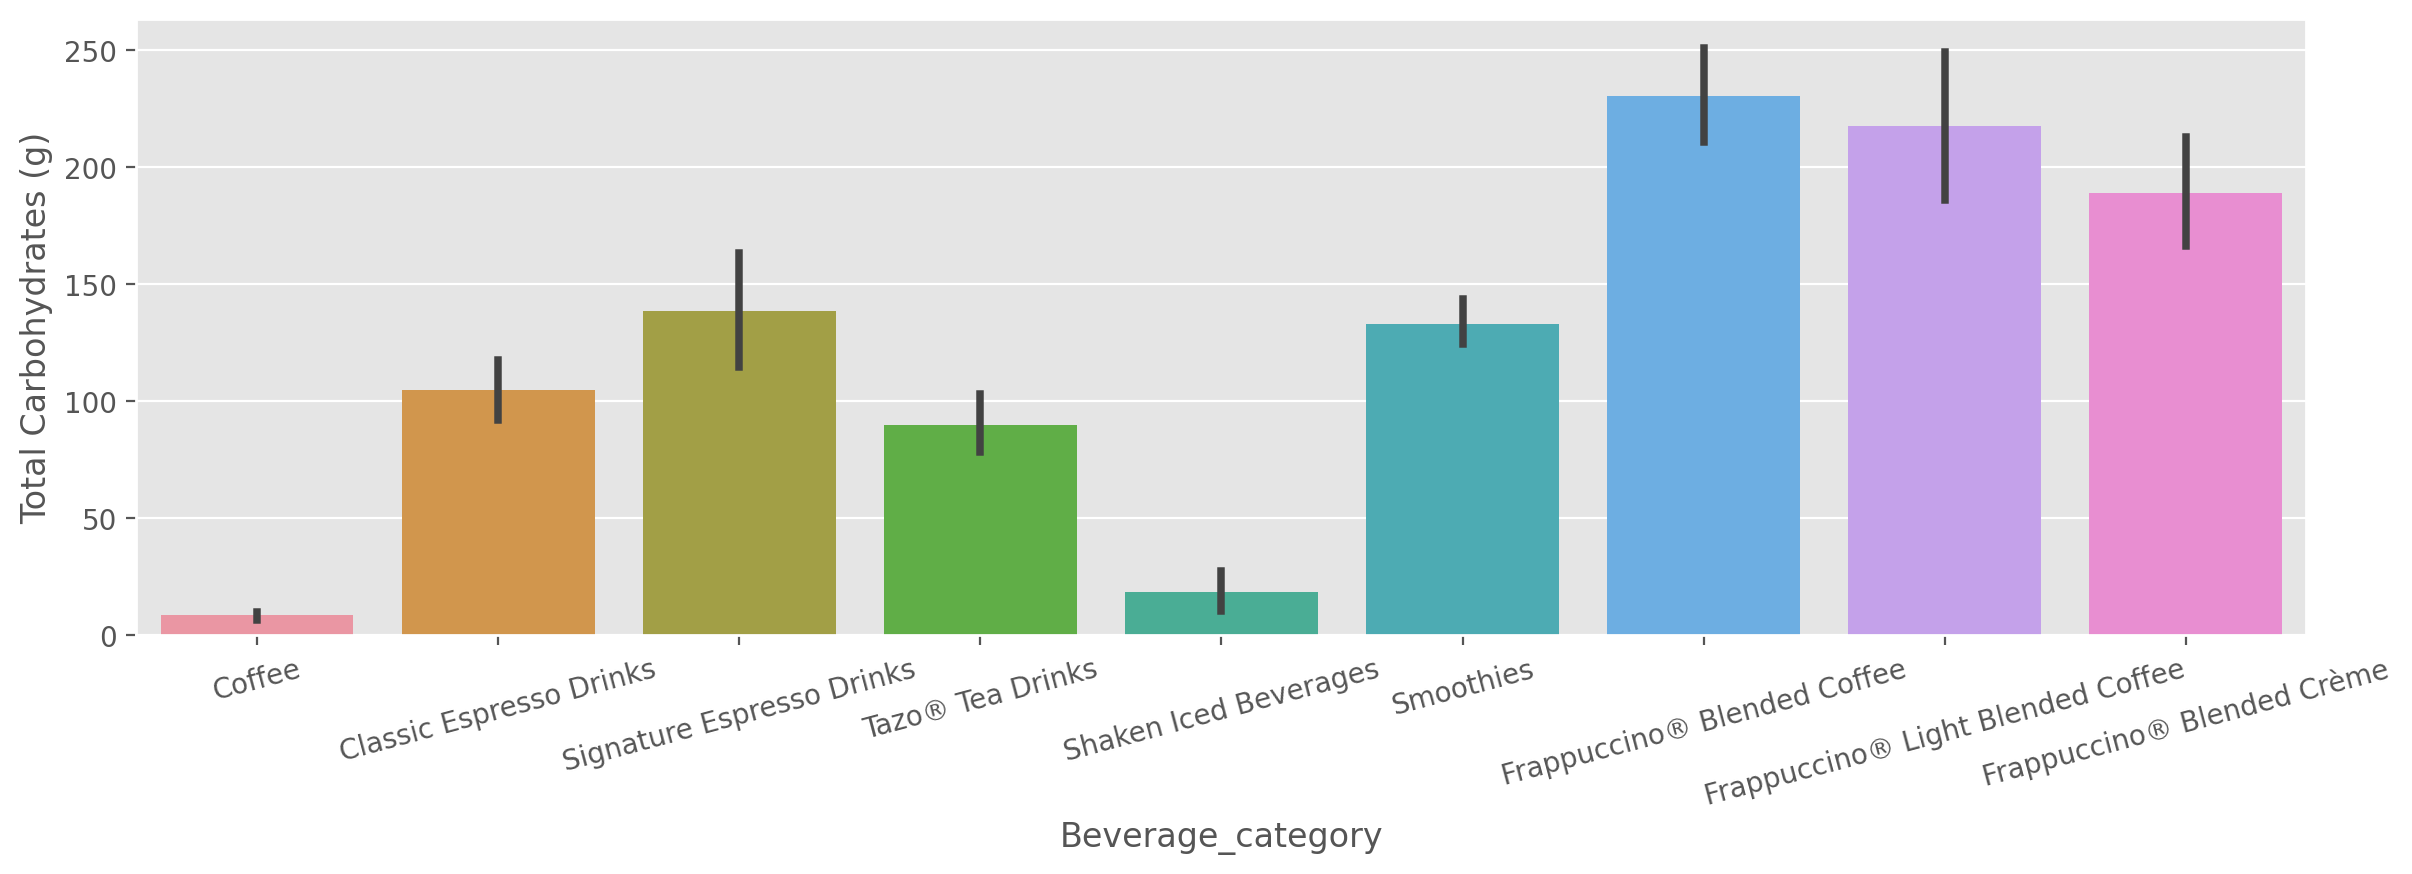

In [115]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Total Carbohydrates (g)', data = data)
plt.xticks(rotation = 15)
plt.show()

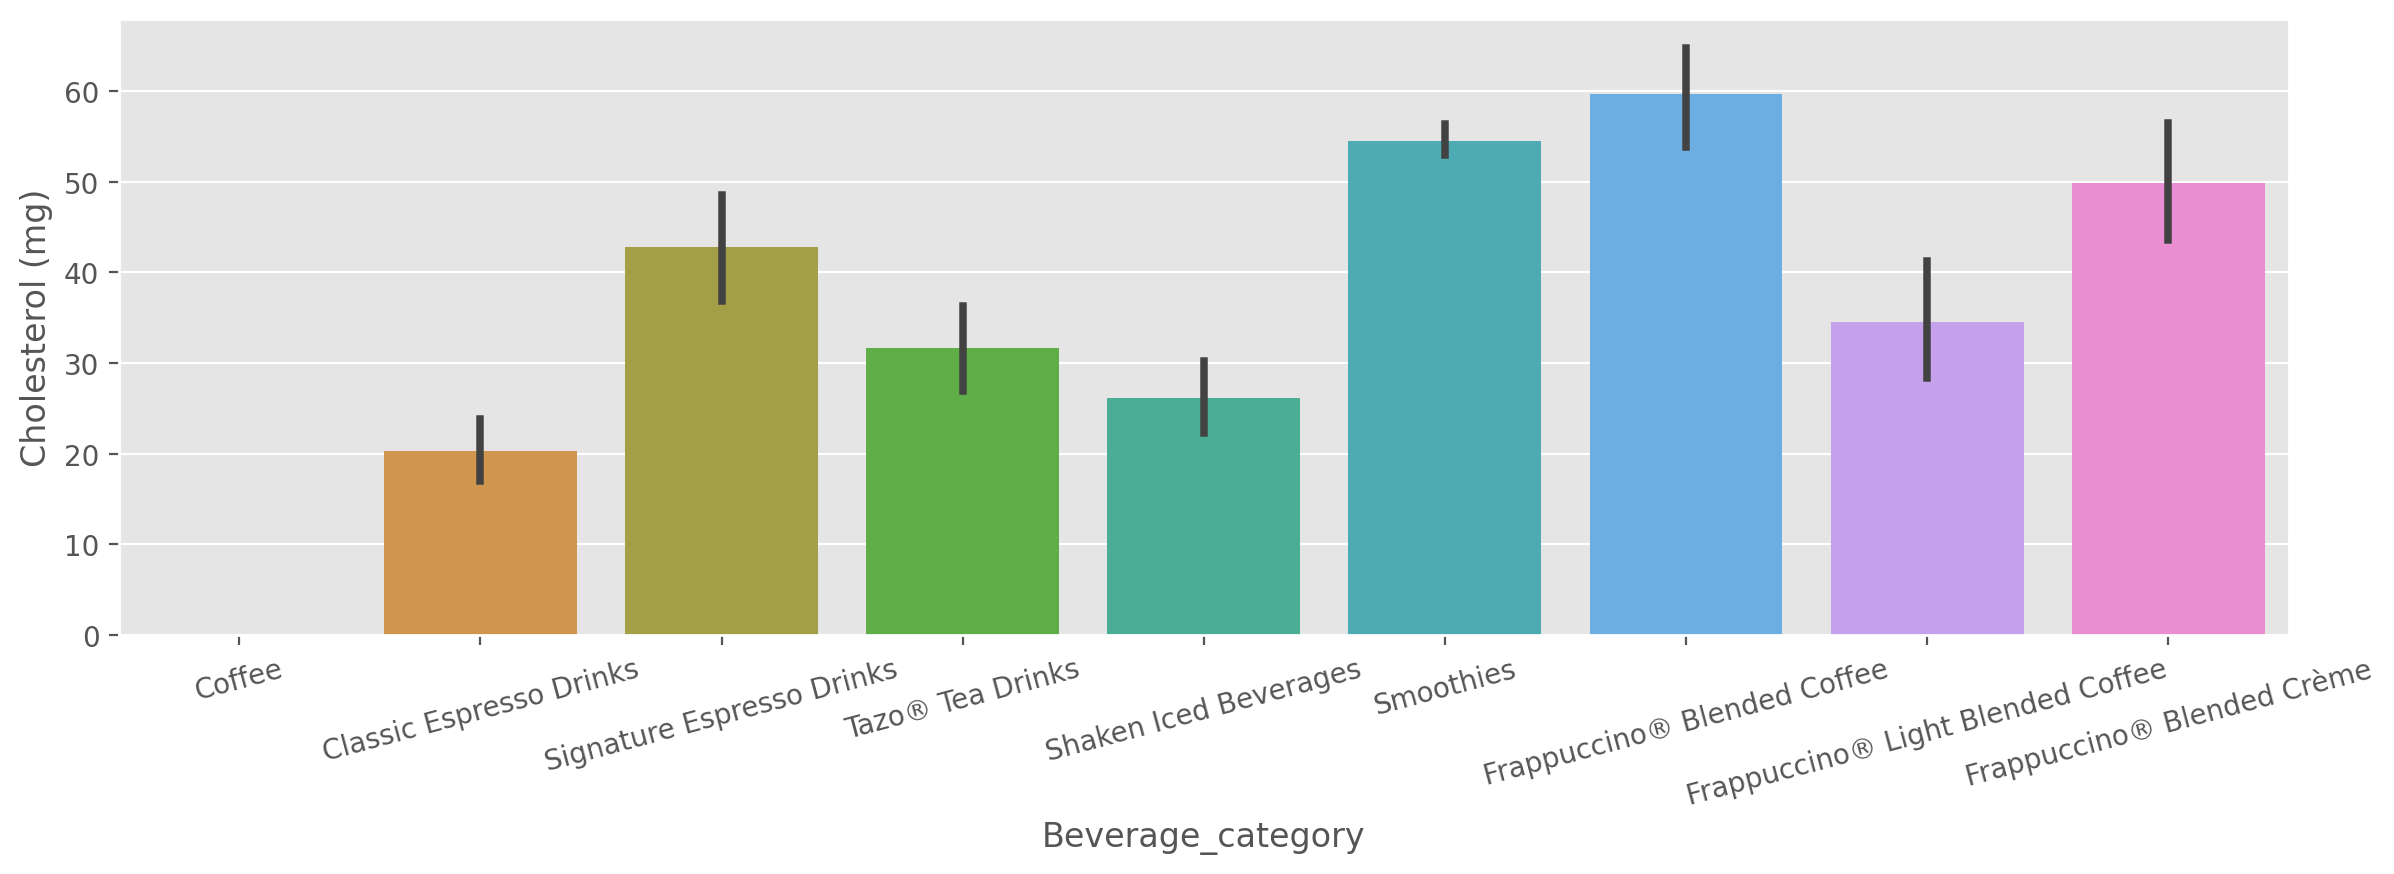

In [116]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Cholesterol (mg)', data = data)
plt.xticks(rotation = 15)
plt.show()

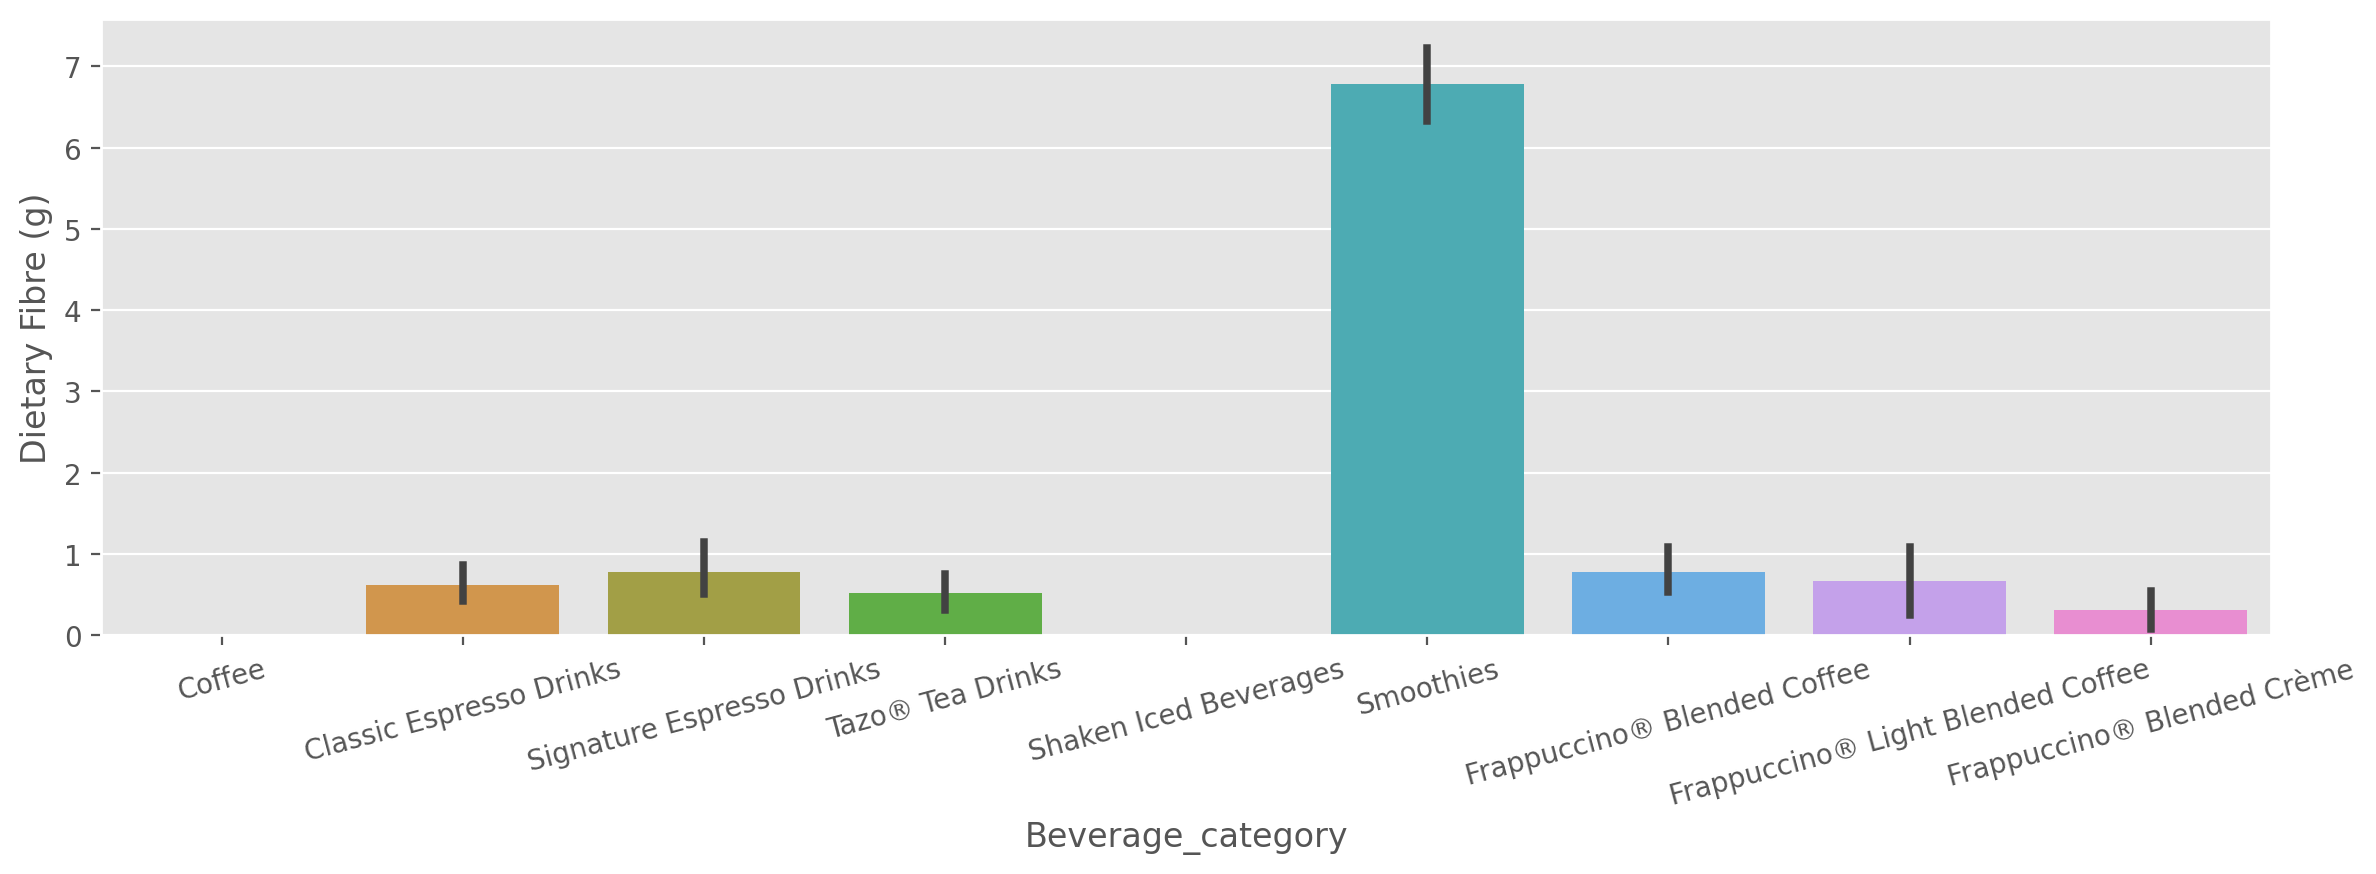

In [118]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Dietary Fibre (g)', data = data)
plt.xticks(rotation = 15)
plt.show()

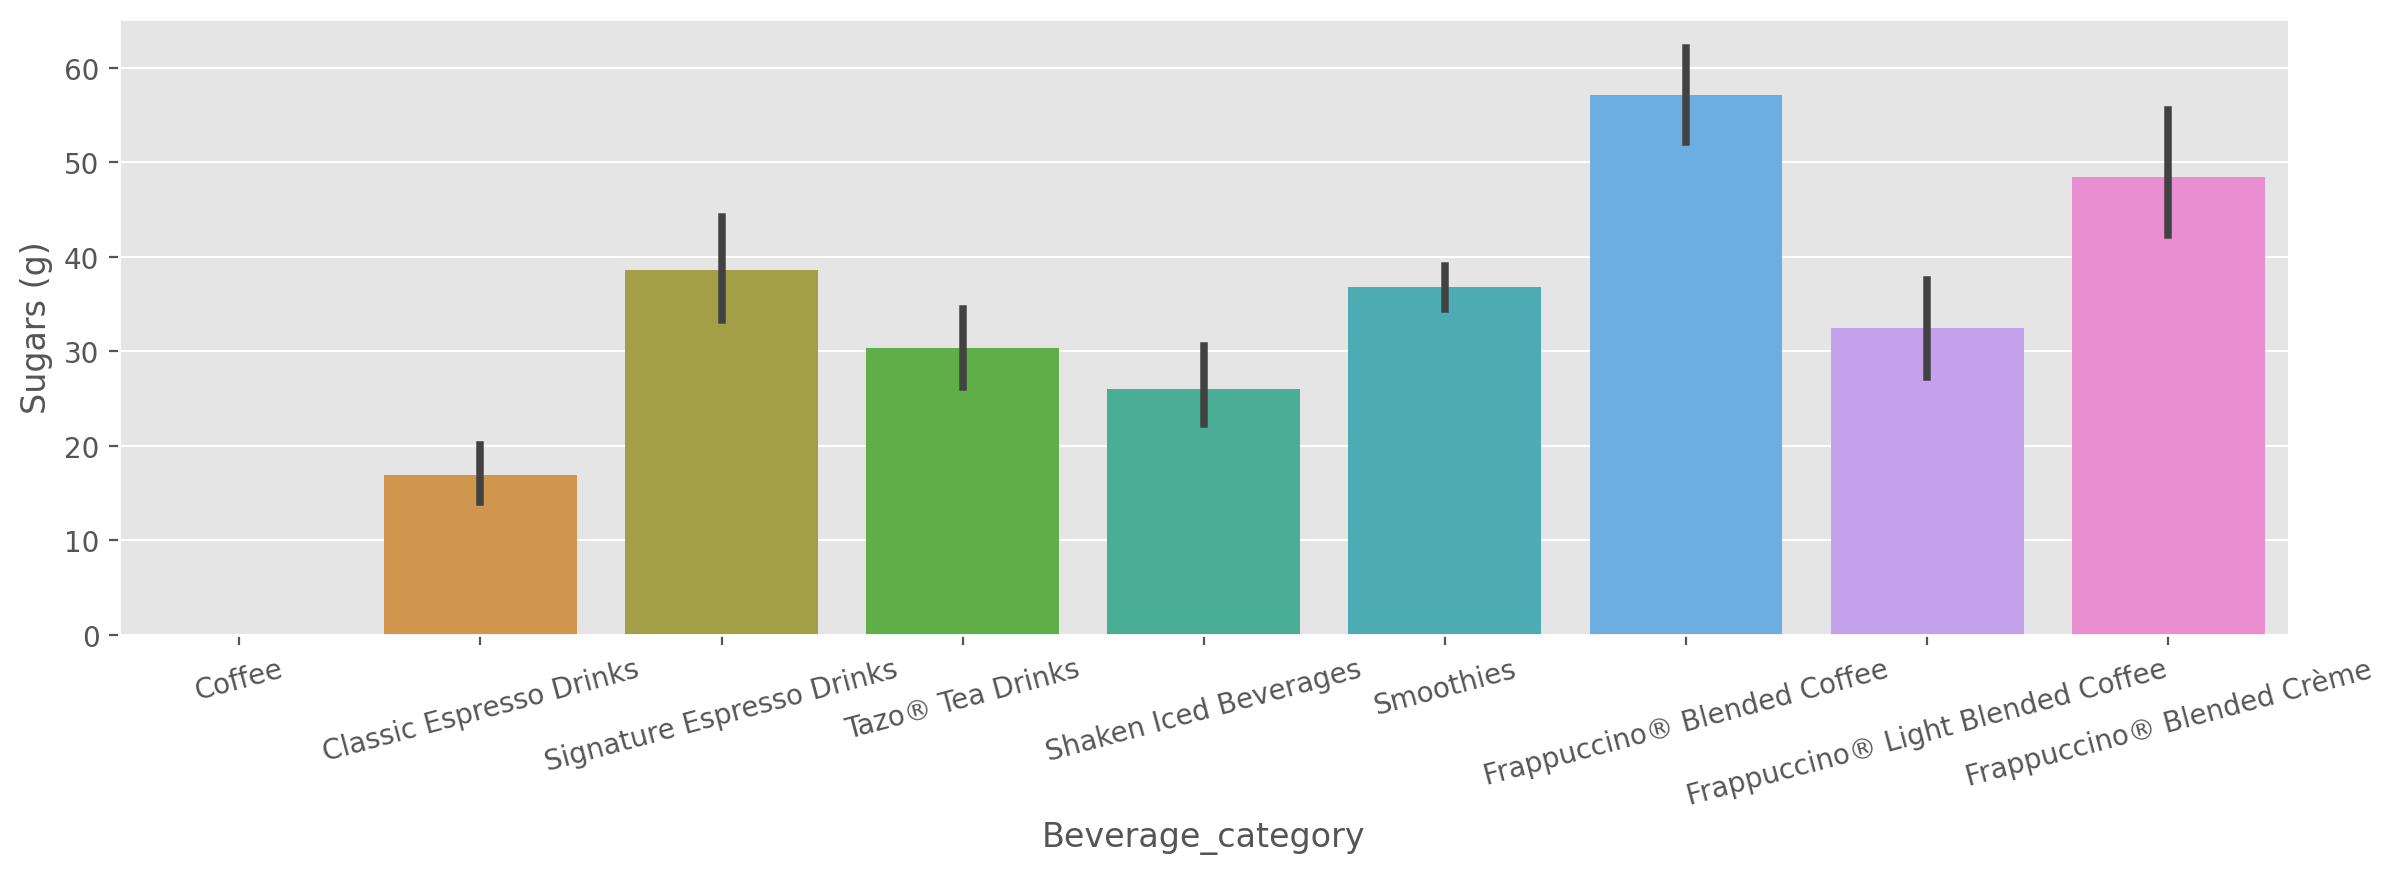

In [117]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Sugars (g)', data = data)
plt.xticks(rotation = 15)
plt.show()

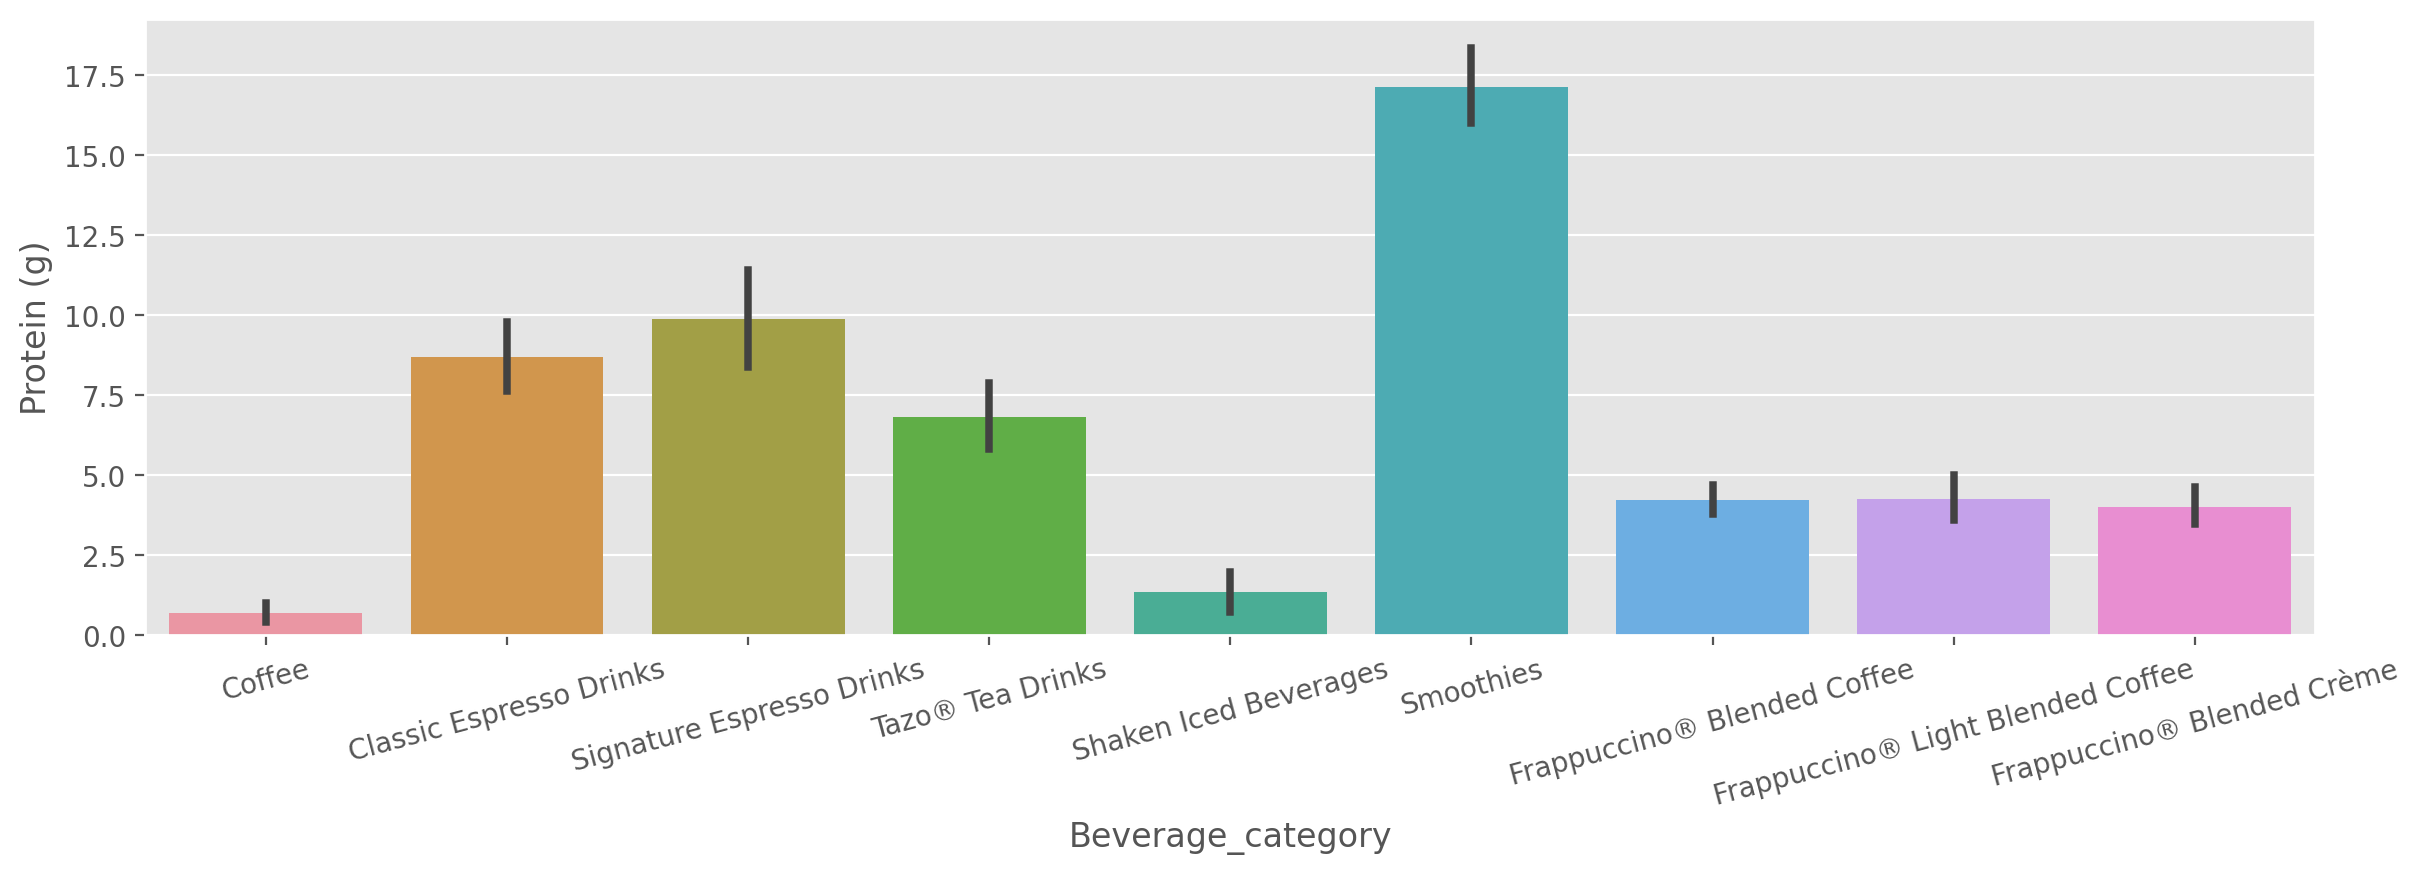

In [119]:
plt.figure(figsize = (14,4), dpi = 200)
sns.barplot('Beverage_category', 'Protein (g)', data = data)
plt.xticks(rotation = 15)
plt.show()

#### Signature Expresso Drinks category is having the highest fat and sodium content.
#### Smoothies and Frappuccino blended coffee category is having the highest Calories content.
#### Frappuccino blended coffee category is having highest Carbohydrates , Sugars and Cholesterol content.	
#### Smoothies is having highest Protein and Dietary Fibre content

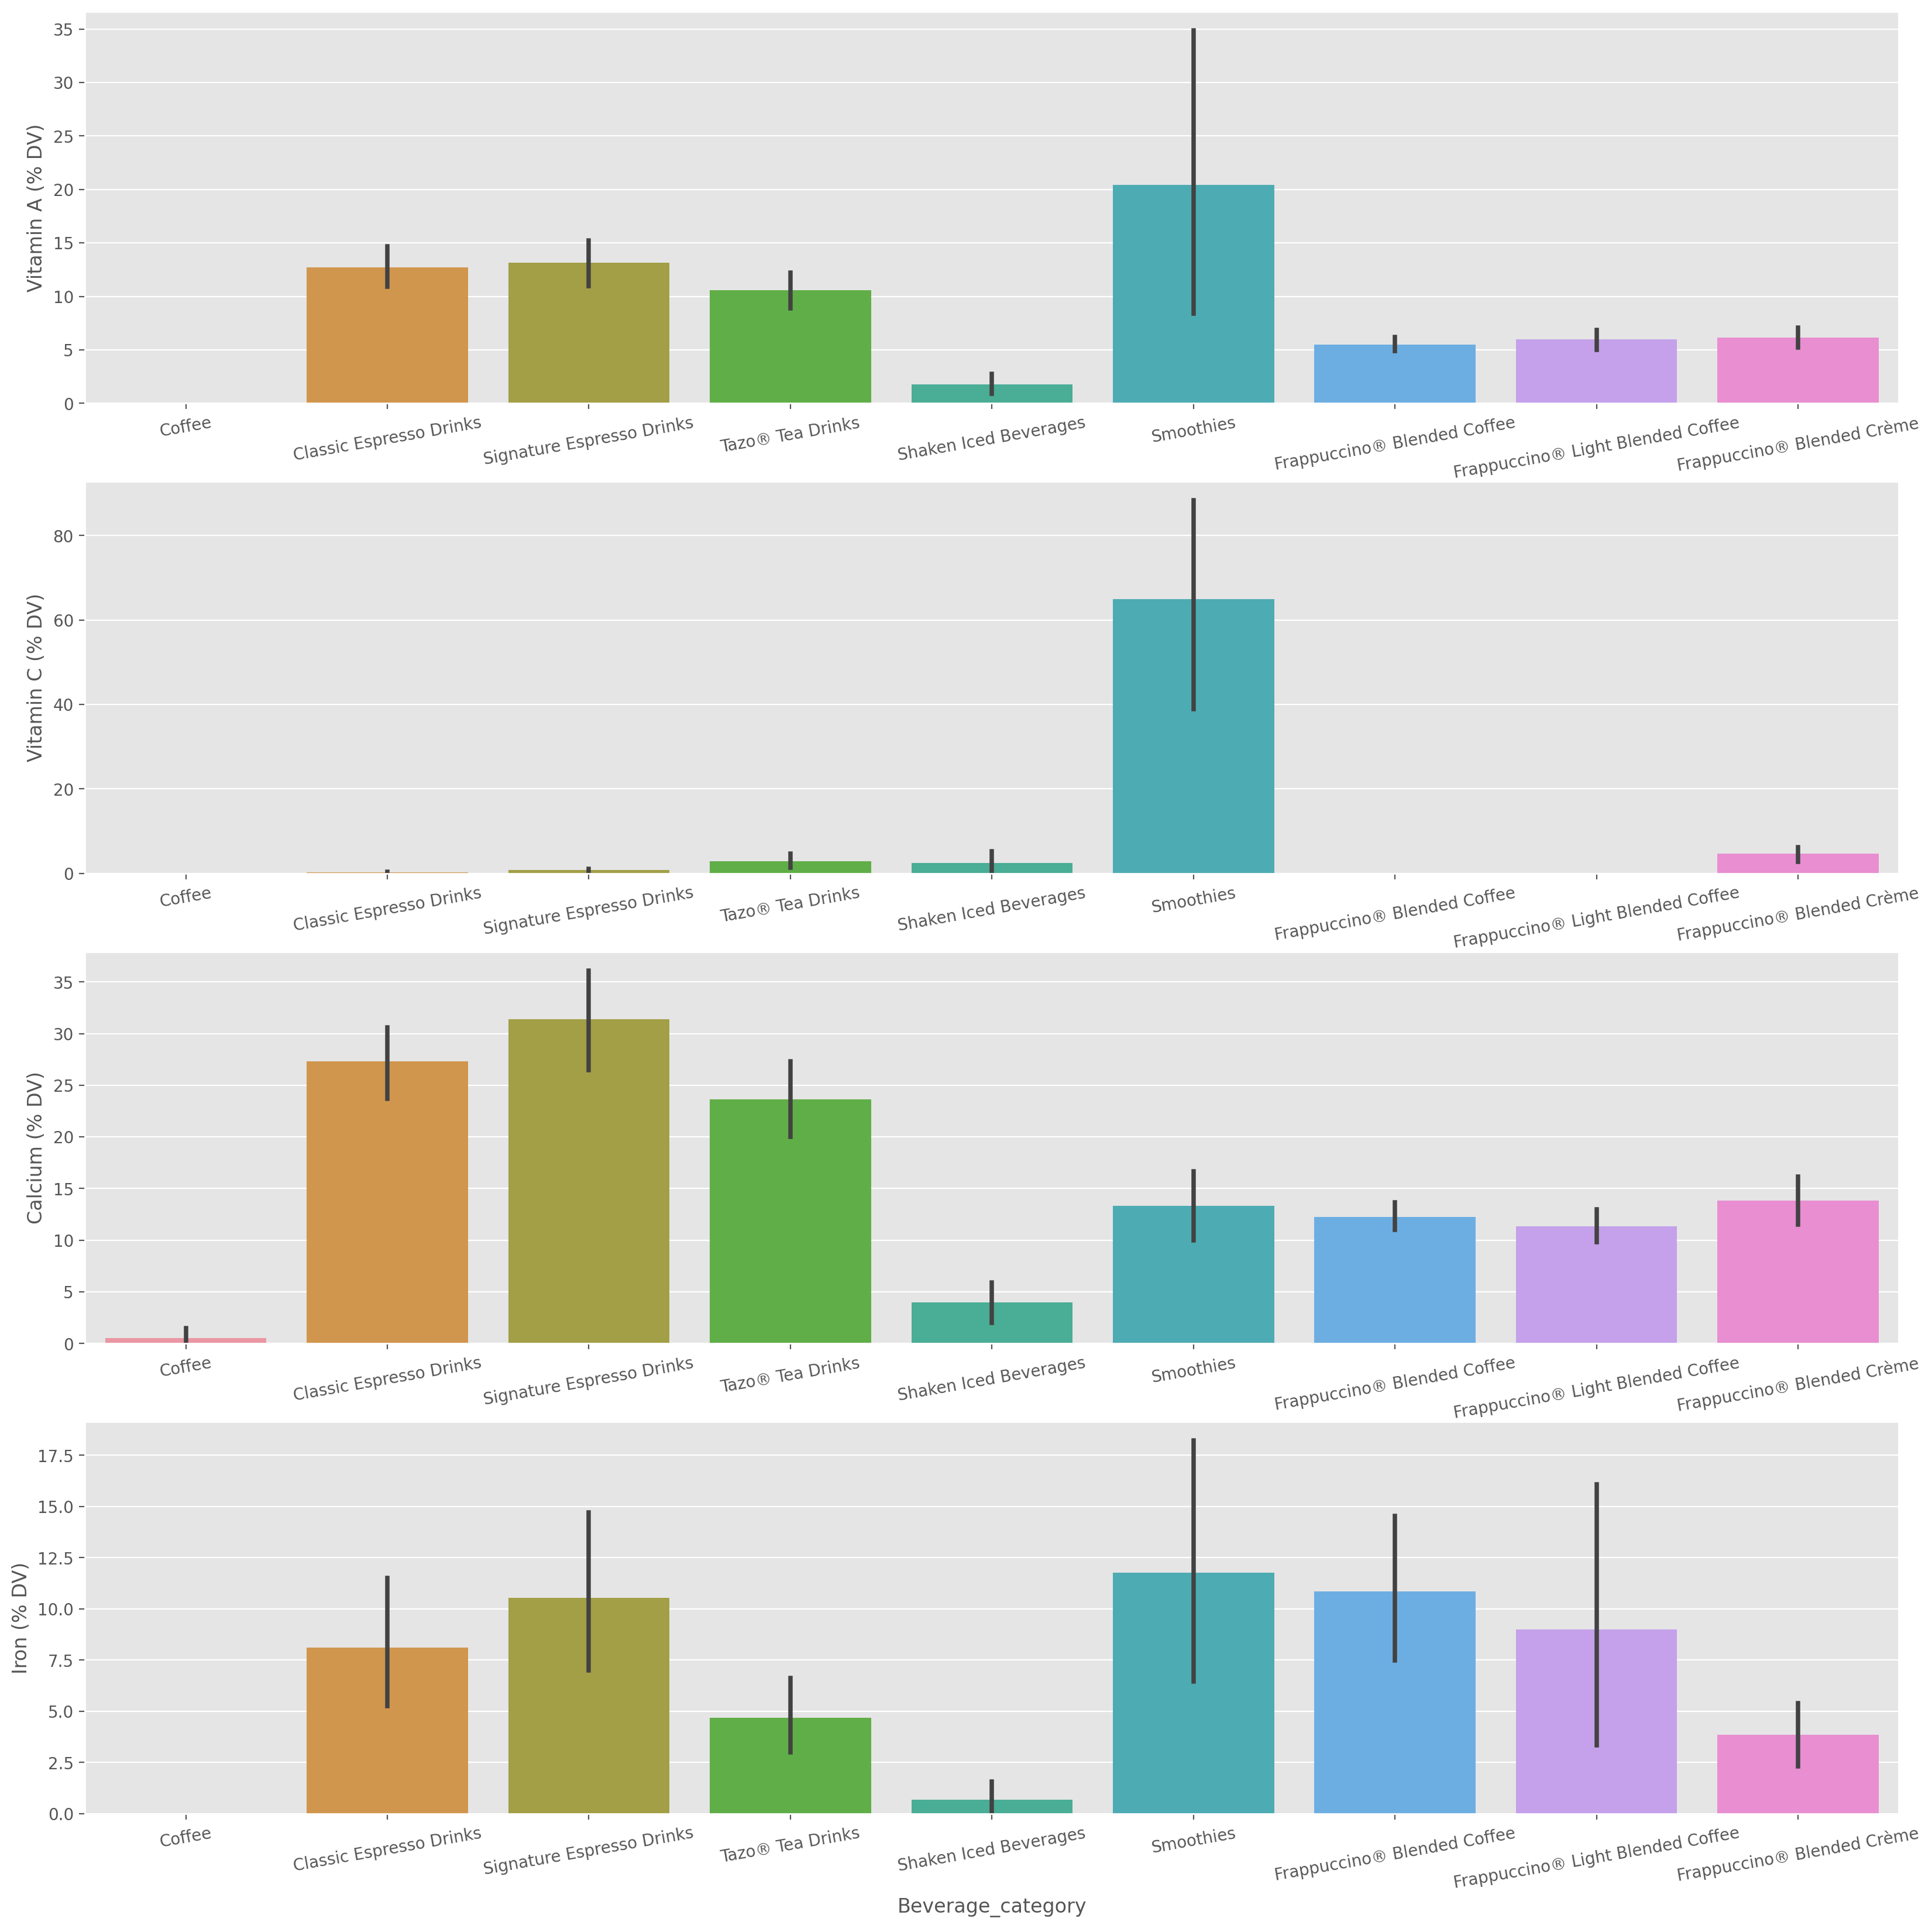

<Figure size 640x480 with 0 Axes>

In [139]:
plt.figure(figsize = (20,20), dpi = 200)
plt.subplot(4,1,1)
sns.barplot('Beverage_category', 'Vitamin A (% DV)', data = data)
plt.xticks(rotation = 10)
plt.subplot(4,1,2)
sns.barplot('Beverage_category', 'Vitamin C (% DV)', data = data)
plt.xticks(rotation = 10)
plt.subplot(4,1,3)
sns.barplot('Beverage_category', 'Calcium (% DV)', data = data)
plt.xticks(rotation = 10)
plt.subplot(4,1,4)
sns.barplot('Beverage_category', 'Iron (% DV)', data = data)
plt.xticks(rotation = 10)
plt.show()
plt.tight_layout()

#### Smoothies are having the highest vitamin A, C and Iron content.
#### Signature Expresso Drinks category is having the highest calcium content.

# Summary

### 'Signature Espresso Drinks', 'Classic Espresso Drinks' and 'Tazo® Tea Drinks' is the most common category among all drink categories where 'Classic Espresso Drinks' is leading all. 
### For all the beverage categories soymilk is the most commonly used product whereas for catagories like 'Signature Espresso Drinks', 'Classic Espresso Drinks' and 'Tazo® Tea Drinks', 2% milk and soymilk is most commonly used.
### Signature Expresso Drinks category is having the highest Fat, Calcium and Sodium content.
### Smoothies and Frappuccino blended coffee category is having the highest Calories content.
### Frappuccino blended coffee category is having highest Carbohydrates , Sugars and Cholesterol content.	
### Smoothies is having highest Protein, Dietary Fibre, Vitamin A, C and Iron content.